<a href="https://colab.research.google.com/github/Pradip240/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_(CHD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

from collections import Counter

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Capstone Project/Cardiovascular Risk Prediction - Pradip Solanki/data/data_cardiovascular_risk.csv'

In [4]:
cvs_df = pd.read_csv(path , index_col = "id")

# Data preparation

In [5]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [7]:
# Looking up for the detailed description of our dataset.
cvs_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Checking min and max, All data points are in valid range. 

Now let's go ahead and check for the missing values in rest of the dataset

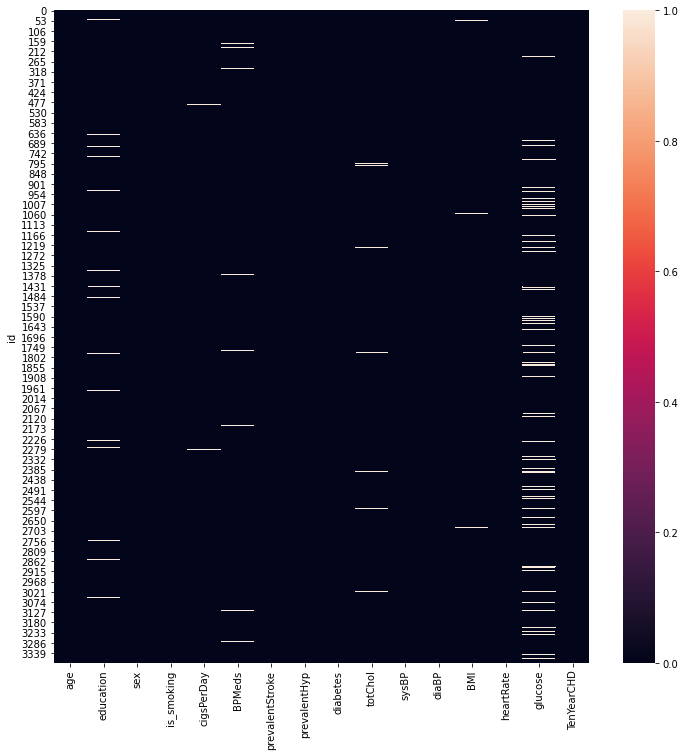

In [8]:
# Plotting the heatmap for missing values 
missing_values = cvs_df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [9]:
# Summing up the missing values 
cvs_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

As we can see above the Glucose feature has the highest number of missing values. Since this is random blood glucose level it can not be replaced with any other synthetic values. It contains 10% of our dataset so if we drop all the missing value in glucose rows then we still left with 90% of data.

In [10]:
cvs_df.dropna(inplace=True)

In [11]:
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   object 
 3   is_smoking       2927 non-null   object 
 4   cigsPerDay       2927 non-null   float64
 5   BPMeds           2927 non-null   float64
 6   prevalentStroke  2927 non-null   int64  
 7   prevalentHyp     2927 non-null   int64  
 8   diabetes         2927 non-null   int64  
 9   totChol          2927 non-null   float64
 10  sysBP            2927 non-null   float64
 11  diaBP            2927 non-null   float64
 12  BMI              2927 non-null   float64
 13  heartRate        2927 non-null   float64
 14  glucose          2927 non-null   float64
 15  TenYearCHD       2927 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 388.7+ KB


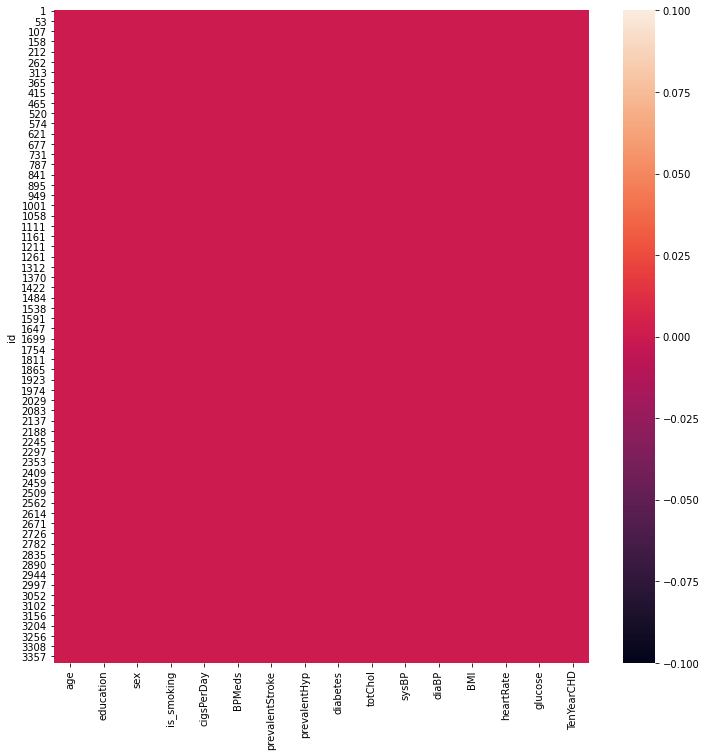

In [12]:
#Plotting the heatmap after treating the missing values
plt.figure(figsize=(12,12))
sns.heatmap(cvs_df.isnull())

After treating missing values let's check the outliers.


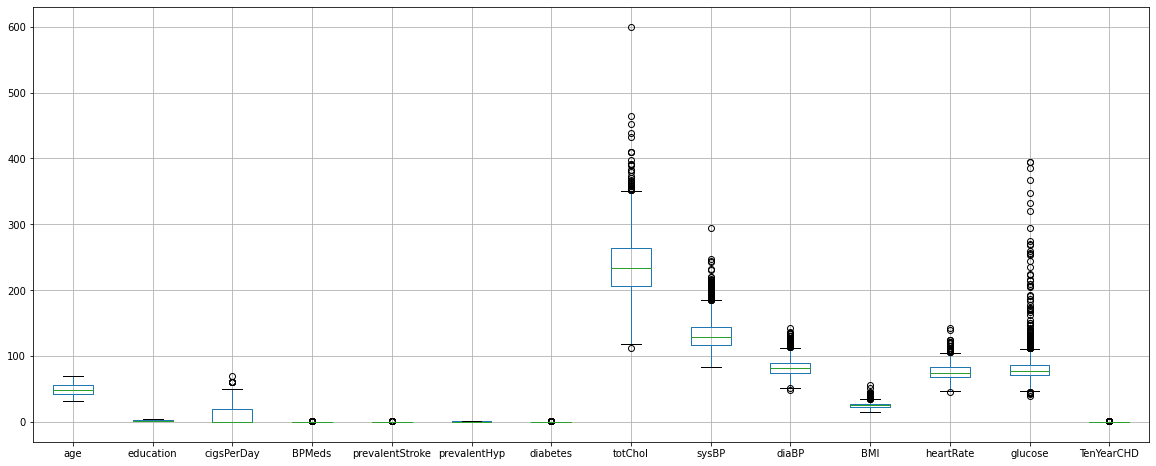

In [13]:
plt.figure(figsize=(20,8))
cvs_df.boxplot()

There are outliers but within the possible range of values.

Let's check the correlation between each feature.

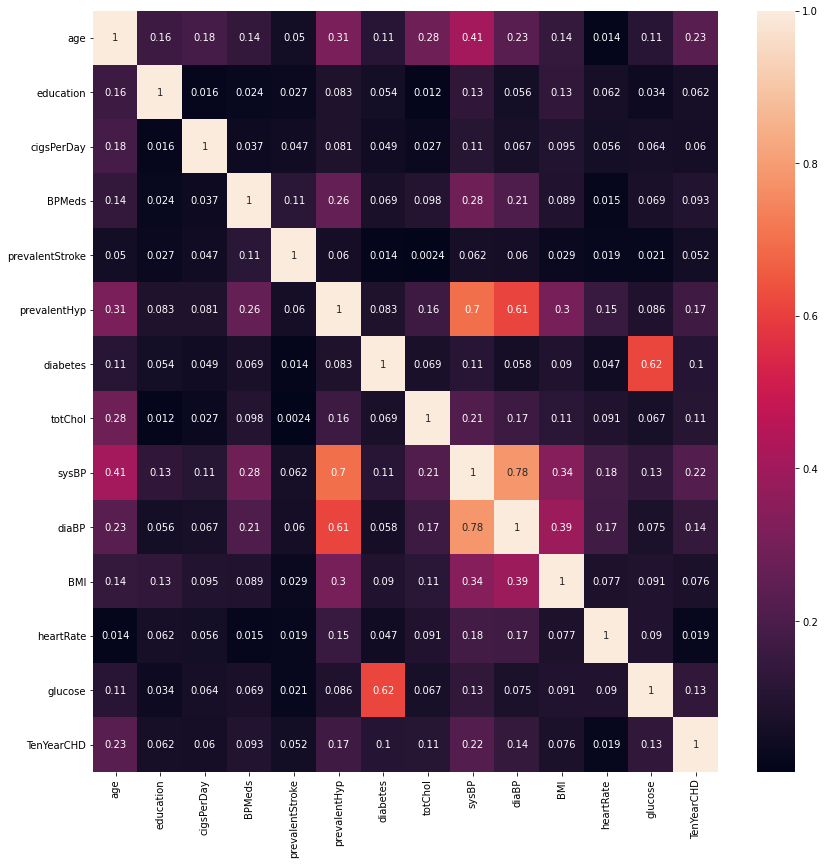

In [14]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = cvs_df.corr()
sns.heatmap(abs(correlation), annot=True)

There is no significant correlation between independent and dependant variables but there is a high correlation within independent variables.

### Feature engineering

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [15]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [16]:
cvs_df['Hypertension'] = cvs_df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
id,,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7


Blood glucose levels can be used to classify the severity of Diabetes.

In [17]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'    

In [18]:
cvs_df['Diabetes'] = cvs_df['glucose'].apply(lambda x: diabetes_grade(x))
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
id,,,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1


The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So new feature containing log-transformed value could be more useful.

In [19]:
cvs_df['SmokingFactor'] = cvs_df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1,0.000000
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1,2.302585
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1,2.995732
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1,3.401197
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1,0.000000


In [20]:
# remove not useful columns
cvs_df.drop(columns=['prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)

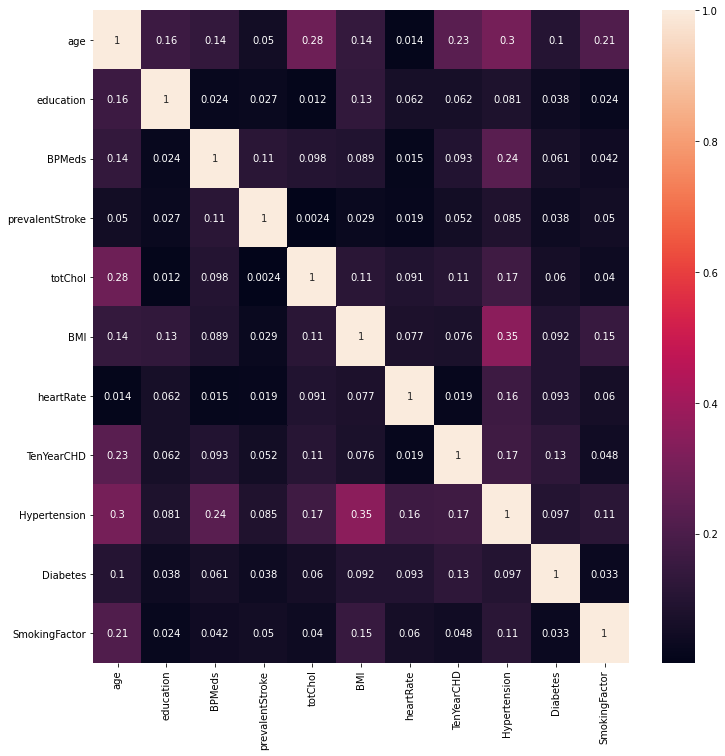

In [21]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = cvs_df.corr()
sns.heatmap(abs(correlation), annot=True)

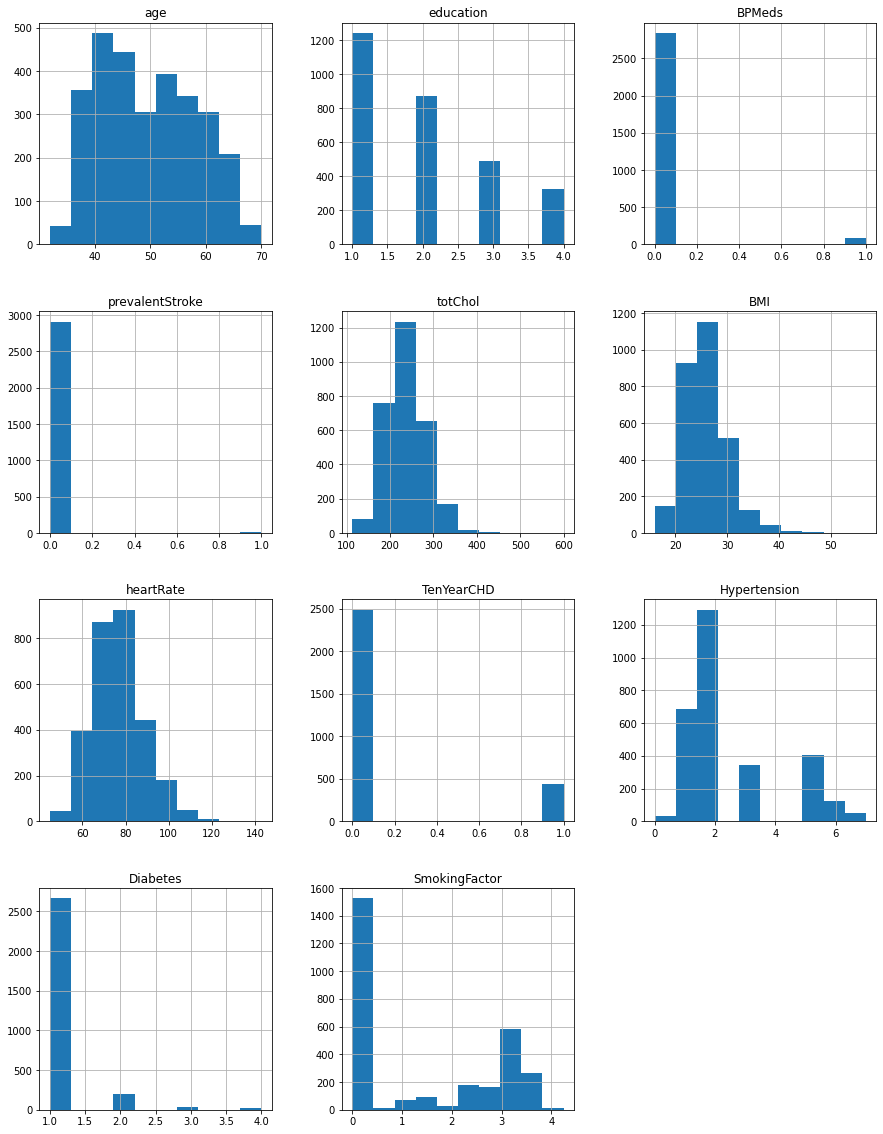

In [22]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cvs_df.hist(ax = ax)
plt.show()

BPMeds and prevalentStroke does not help in explaining variance so we can remove those columns.

In [23]:
# remove not useful columns
cvs_df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [24]:
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2927 non-null   int64  
 1   education      2927 non-null   float64
 2   sex            2927 non-null   object 
 3   totChol        2927 non-null   float64
 4   BMI            2927 non-null   float64
 5   heartRate      2927 non-null   float64
 6   TenYearCHD     2927 non-null   int64  
 7   Hypertension   2927 non-null   int64  
 8   Diabetes       2927 non-null   int64  
 9   SmokingFactor  2927 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 251.5+ KB


Converting categorical data to numeric data for model training.

In [25]:
cvs_df['sex'] = cvs_df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [26]:
cvs_df.head()

,age,education,sex,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,
1,36,4.0,1,212.0,29.77,72.0,0,5,1,0.000000
2,46,1.0,0,250.0,20.35,88.0,0,1,1,2.302585
3,50,1.0,1,233.0,28.26,68.0,1,3,1,2.995732
4,64,1.0,0,241.0,26.42,70.0,0,2,1,3.401197
5,61,3.0,0,272.0,32.80,85.0,1,7,1,0.000000


# Model Building

In [27]:
dependent_variable = 'TenYearCHD'
independent_variable = list(cvs_df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes', 'SmokingFactor']


In [28]:
X = cvs_df[independent_variable].values
y = cvs_df[dependent_variable].values

Let's Resample the dataset to over come this imbalance.
We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [29]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [121]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

## **Knn**

In [122]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test) 

In [123]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.97621712 0.89563514 0.90123111 0.84946838 0.85366536
 0.8262451  0.82820369 0.80470062 0.81281477]
Test Accuracy:  [0.85123043 0.84228188 0.80089485 0.80313199 0.77516779 0.77740492
 0.75391499 0.7639821  0.74049217 0.74944072]


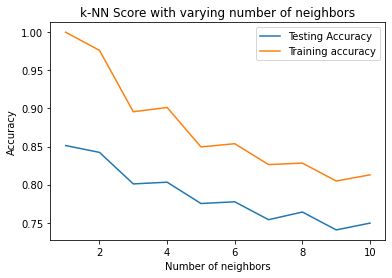

In [124]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

In [125]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [126]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [127]:
knn_cv.best_score_

0.8259654071418778

In [128]:
knn_cv.best_params_

{'n_neighbors': 1}

In [129]:
# predictions
knn_predict = knn_cv.predict(X_test)

In [130]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       509
           1       0.76      0.95      0.85       385

    accuracy                           0.85       894
   macro avg       0.86      0.86      0.85       894
weighted avg       0.87      0.85      0.85       894



# **Logistic Regression**

In [41]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.08382418, -0.05050959,  0.44896663,  0.00492634,  0.00404848,
        -0.00921147,  0.19830119,  0.52597847,  0.25472166]])

In [43]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [44]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6916620033575825
The accuracy on test data is  0.6722595078299777


[[1481  507]
 [ 595  991]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

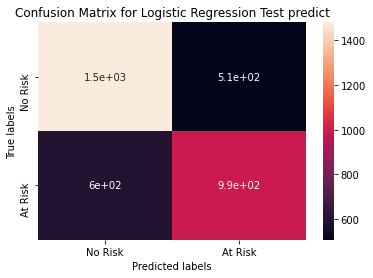

In [46]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[368 126]
 [167 233]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

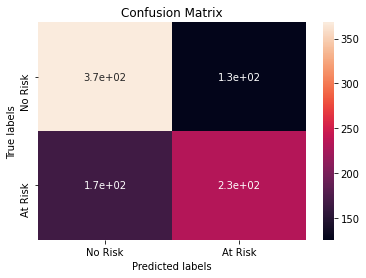

In [48]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [50]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6637196356275303
Accuracy score: 0.6722595078299777
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1988
           1       0.66      0.62      0.64      1586

    accuracy                           0.69      3574
   macro avg       0.69      0.68      0.69      3574
weighted avg       0.69      0.69      0.69      3574



              precision    recall  f1-score   support

           0       0.69      0.74      0.72       494
           1       0.65      0.58      0.61       400

    accuracy                           0.67       894
   macro avg       0.67      0.66      0.66       894
weighted avg       0.67      0.67      0.67       894



### Building Desicion Tree Model
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [68]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting on test cell and train cell

In [69]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [70]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 80.08948545861297
the training accuracy is 83.10016787912703


[Text(330.8491847826087, 868.25, 'X[0] <= 46.017\nentropy = 0.991\nsamples = 3574\nvalue = [1988, 1586]'),
 Text(111.19565217391303, 792.75, 'X[8] <= 0.004\nentropy = 0.762\nsamples = 1173\nvalue = [914, 259]'),
 Text(53.91304347826087, 717.25, 'X[7] <= 1.164\nentropy = 0.419\nsamples = 424\nvalue = [388, 36]'),
 Text(26.956521739130434, 641.75, 'X[3] <= 389.912\nentropy = 0.333\nsamples = 391\nvalue = [367, 24]'),
 Text(13.478260869565217, 566.25, 'entropy = 0.304\nsamples = 388\nvalue = [367, 21]'),
 Text(40.43478260869565, 566.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(80.8695652173913, 641.75, 'X[5] <= 79.592\nentropy = 0.946\nsamples = 33\nvalue = [21, 12]'),
 Text(67.39130434782608, 566.25, 'X[1] <= 3.362\nentropy = 0.949\nsamples = 19\nvalue = [7, 12]'),
 Text(53.91304347826087, 490.75, 'entropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(80.8695652173913, 490.75, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(94.34782608695652, 566.25, 'entropy = 0.0\nsa

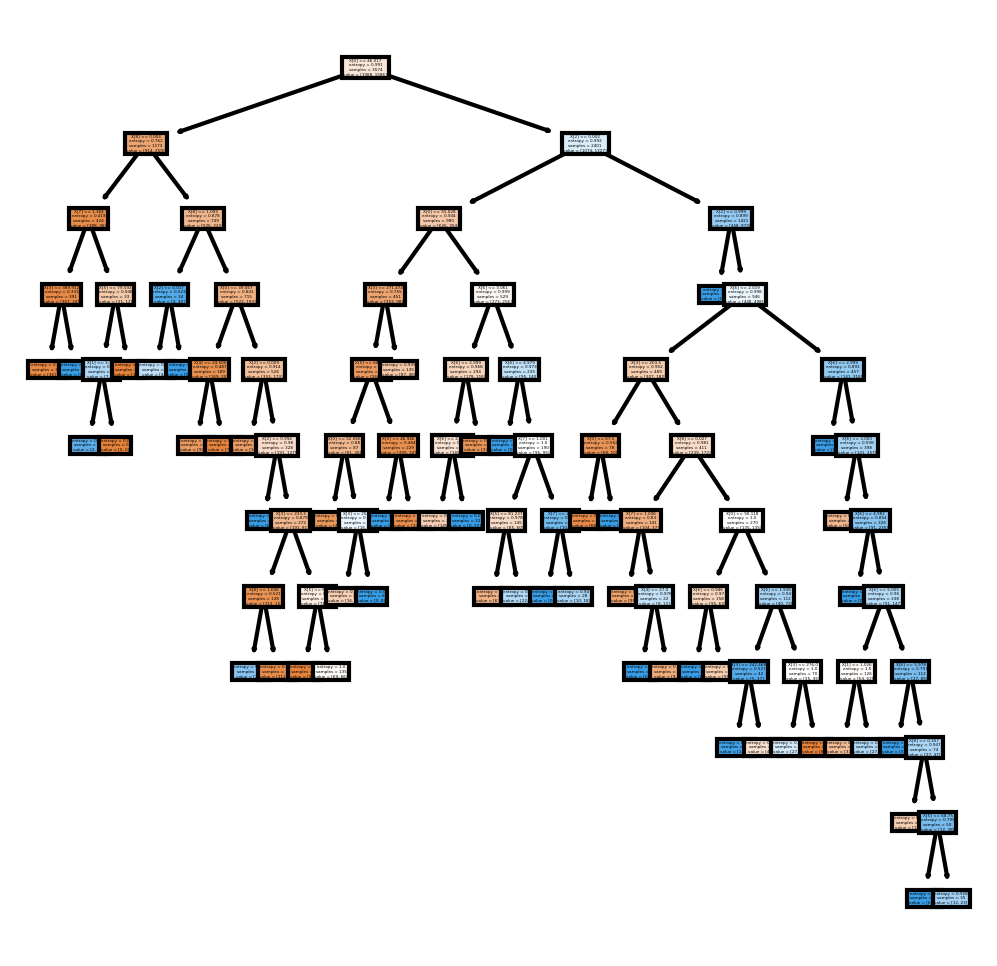

In [71]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[1881  107]
 [ 497 1089]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

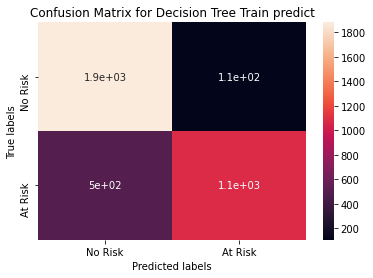

In [73]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[461  33]
 [145 255]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

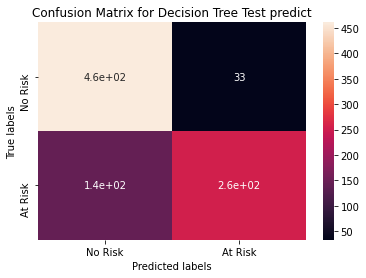

In [75]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [77]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1988
           1       0.91      0.69      0.78      1586

    accuracy                           0.83      3574
   macro avg       0.85      0.82      0.82      3574
weighted avg       0.84      0.83      0.83      3574



In [79]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       494
           1       0.89      0.64      0.74       400

    accuracy                           0.80       894
   macro avg       0.82      0.79      0.79       894
weighted avg       0.82      0.80      0.79       894



## Building Ensembles of Decision Tree


In [80]:
classifier = RandomForestClassifier(n_estimators=30,max_depth=20,random_state=30,min_samples_split=3,criterion='entropy')

In [81]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [82]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

Finding the accuracy and Roc_Auc score

In [83]:
accuracy_score(y_train,train_preds)

0.997481813094572

In [84]:
accuracy_score(y_test,test_preds)

0.8803131991051454

In [85]:
roc_auc_score(y_test,test_preds)

0.8733856275303644

In [86]:
roc_auc_score(y_train,train_preds)

0.9971626733921816

[[1988    0]
 [   9 1577]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

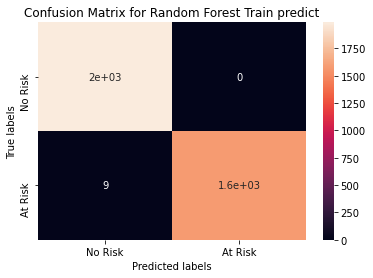

In [87]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[464  30]
 [ 77 323]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

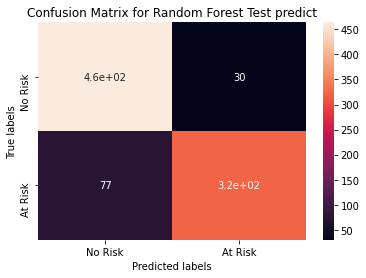

In [88]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.99      1.00      1586

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



In [90]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       494
           1       0.92      0.81      0.86       400

    accuracy                           0.88       894
   macro avg       0.89      0.87      0.88       894
weighted avg       0.88      0.88      0.88       894



In [91]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [92]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [94]:
gradientBC.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [95]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

The accuracy and Roc_Auc Score

In [96]:
accuracy_score(y_train,train_preds)

0.902070509233352

In [97]:
accuracy_score(y_test,test_preds)

0.8803131991051454

In [98]:
roc_auc_score(y_test,test_preds)


0.8705313765182185

In [99]:
roc_auc_score(y_train,train_preds)

0.8920820001979088

[[1950   38]
 [ 312 1274]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

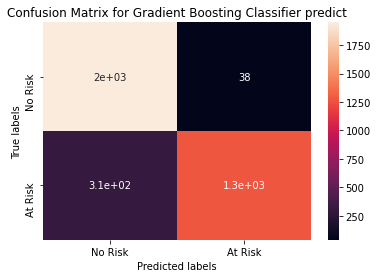

In [101]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[476  18]
 [ 89 311]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

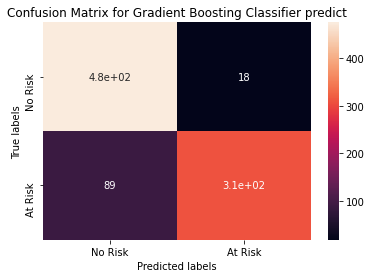

In [103]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifier')

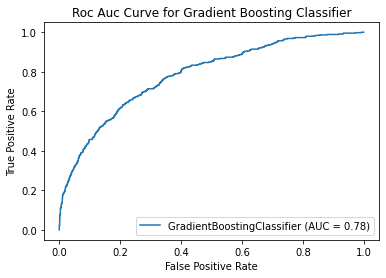

In [105]:
plot_roc_curve(gradientBC,X,y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

classification repost of train and test

In [107]:
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       494
           1       0.95      0.78      0.85       400

    accuracy                           0.88       894
   macro avg       0.89      0.87      0.88       894
weighted avg       0.89      0.88      0.88       894



              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1988
           1       0.97      0.80      0.88      1586

    accuracy                           0.90      3574
   macro avg       0.92      0.89      0.90      3574
weighted avg       0.91      0.90      0.90      3574



In [108]:
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [109]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [110]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [111]:
accuracy_score(y_train,train_preds)

0.8108561835478455

In [112]:
accuracy_score(y_test,test_preds)

0.9563758389261745

In [113]:
roc_auc_score(y_test,test_preds)

0.9522014170040486

In [114]:
roc_auc_score(y_train,train_preds)

0.8011013749584519

[[1765  223]
 [ 453 1133]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

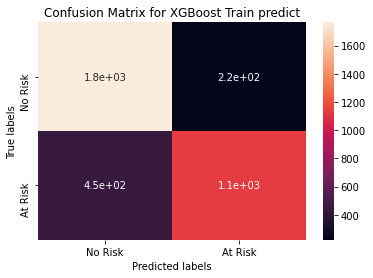

In [115]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[490   4]
 [ 35 365]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

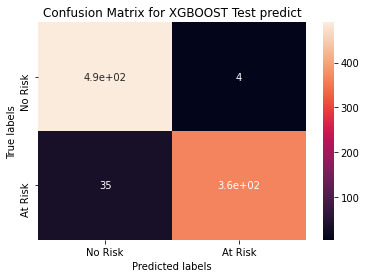

In [116]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classifucation Repost For train and test

In [118]:
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       494
           1       0.99      0.91      0.95       400

    accuracy                           0.96       894
   macro avg       0.96      0.95      0.96       894
weighted avg       0.96      0.96      0.96       894



              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1988
           1       0.84      0.71      0.77      1586

    accuracy                           0.81      3574
   macro avg       0.82      0.80      0.80      3574
weighted avg       0.81      0.81      0.81      3574



Visualising the tree

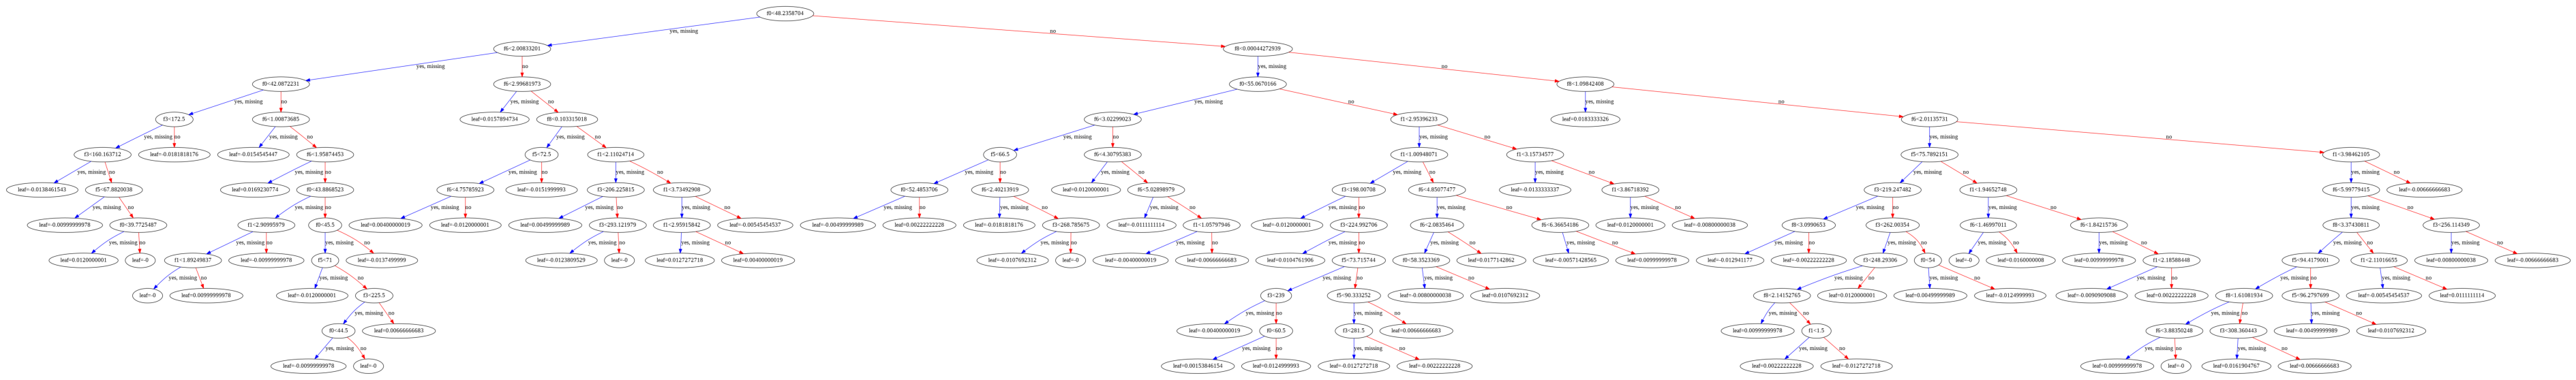

In [119]:
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(100, 10)
plt.show()

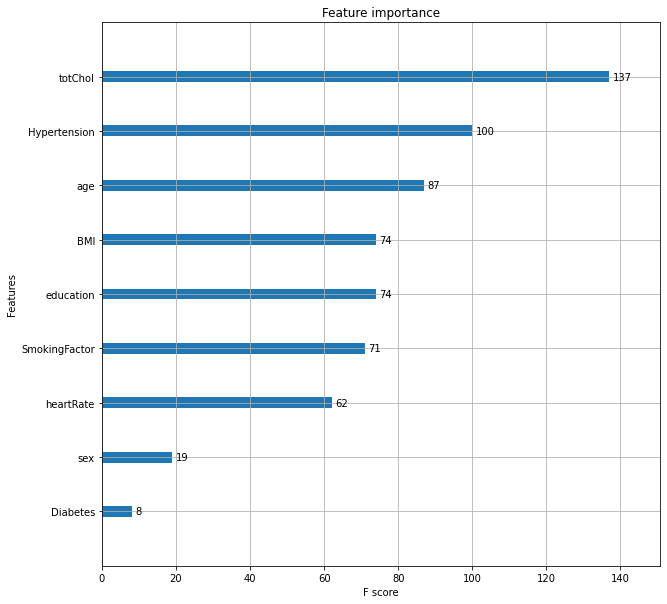

In [120]:
orig_feature_names = list(cvs_df.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()